# USA Violence : 2000 School Shootings in 21 Months

### Authors:
- Fuad Shabbanov 428246
- Oybek Ismatov 436651


### Dataset source link - https://www.kaggle.com/datasets/mauryansshivam/usa-violence-2000-school-shootings-in-21-months/data

## Introduction to the project

In recent years, incidents of violence within educational institutions have gained significant attention and raised concerns about the safety and security of students and staff. One of the most devastating forms of violence is school shootings, which have become a recurring issue in the United States. Understanding the patterns, characteristics, and factors associated with these incidents is crucial for implementing effective preventive measures and promoting a safer learning environment.

## Project Overview

This project focuses on analyzing data related to school shootings in the United States, specifically during a 21-month period. The dataset includes information about incidents such as the location, date, number of victims killed and injured, and other relevant details. By leveraging data analysis and visualization techniques, the goal is to gain insights into the dynamics of school shootings, identify trends, and explore potential correlations with various factors.

## Key Objectives:

1. Exploratory Data Analysis (EDA): Conduct a thorough exploration of the dataset to uncover patterns, distributions, and trends related to school shootings.

2. Temporal Analysis: Investigate whether there are specific temporal patterns, such as seasonality or trends over the 21-month period.

3. Geospatial Analysis: Explore the geographical distribution of school shootings to identify high-risk areas and potential hotspots.

4. Casualty Analysis: Examine the total number of casualties, including victims killed and injured, and identify any patterns or outliers.

5. Text Analysis: Analyze any textual information available in the dataset, such as incident descriptions, to extract insights or common themes.

6. Feature Engineering: Create new features that may enhance the predictive power of models or provide additional context to the analysis.

## Significance:

By comprehensively analyzing the dataset, this project aims to contribute to the understanding of school shootings in the United States. The insights derived from the analysis can inform policymakers, educators, and law enforcement agencies in developing targeted strategies to prevent and respond to such incidents. Ultimately, the goal is to contribute to the ongoing efforts to ensure the safety and well-being of students and educators across the nation.

# Import the libraries

In [99]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [101]:
!pip install autoviz
!pip install dataprep

In [102]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder

from category_encoders import OneHotEncoder

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [103]:
df = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 1  Project Fuad-Oybek/School Shootings USA dataset.csv', index_col='Incident ID') # Reads the dataset from a CSV file into a Pandas DataFrame
item0 = df.shape[0]  # Stores the initial number of rows in the DataFrame
df = df.drop_duplicates()  # Removes duplicate rows from the DataFrame
item1 = df.shape[0]  # Stores the number of rows after removing duplicates
print(f"There are {item0-item1} duplicates found in the dataset")  # Prints the number of duplicates that were removed
# create total number of çasualties as the sum of killed and injured victims
df['total_casualties'] = df['Victims Killed'] + df['Victims Injured']
# Exclude records with null casualties
df = df[~df['total_casualties'].isnull()]
# log10-transform the label
df['log10_total_casualties'] = df['total_casualties'].apply(lambda x: np.log10(1+x))

# combine city and state
df['location'] = df['City Or County'] + ', ' + df['State']

# extract year and month from datetime and transform to string
df['incident_month'] = pd.to_datetime(df['Incident Date']).dt.to_period('M').astype(str)

# Select only specific columns of interest
selected_cols = ['log10_total_casualties', 'location', 'incident_month']
df = df[selected_cols]

print(df.shape)  # Prints the dimensions (rows and columns) of the filtered DataFrame
df.sample(5).T  # Displays a random sample of 5 rows transposed for better visibility

There are 5 duplicates found in the dataset
(1995, 3)


Incident ID,2496342,2401801,2292239,2429319,2676410
log10_total_casualties,0.0,0.0,0.477121,0.30103,0.0
location,"Fort George G Meade (Fort Meade), Maryland","Hephzibah, Georgia","Manassas, Virginia","Des Moines, Iowa","Whiteland (New Whiteland), Indiana"
incident_month,2023-05,2022-08,2022-01,2022-03,2023-09


In [104]:
df.columns

Index(['log10_total_casualties', 'location', 'incident_month'], dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 2241994 to 2310278
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log10_total_casualties  1995 non-null   float64
 1   location                1995 non-null   object 
 2   incident_month          1995 non-null   object 
dtypes: float64(1), object(2)
memory usage: 62.3+ KB


In [106]:
df.nunique()

log10_total_casualties      10
location                  1062
incident_month              24
dtype: int64

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
log10_total_casualties,1995.0,0.038295,0.127795,0.0,0.0,0.0,0.0,1.591065


In [108]:
df['location'].value_counts().head(30)

Louisville, Kentucky                33
Nashville, Tennessee                25
Columbus, Ohio                      24
Baltimore, Maryland                 23
Las Vegas, Nevada                   19
Indianapolis, Indiana               17
Philadelphia, Pennsylvania          16
Houston, Texas                      16
San Antonio, Texas                  16
Chicago, Illinois                   15
Tallahassee, Florida                13
Milwaukee, Wisconsin                13
Phoenix, Arizona                    13
Charlotte, North Carolina           12
Albuquerque, New Mexico             12
Columbia, South Carolina            11
Memphis, Tennessee                  10
Toledo, Ohio                        10
Tampa, Florida                      10
Tulsa, Oklahoma                      9
Atlanta, Georgia                     9
Greensboro, North Carolina           9
Richmond, Virginia                   9
Washington, District of Columbia     8
Arlington, Texas                     8
Jacksonville, Florida    

In [109]:
df['incident_month'].value_counts().head(20)

2022-09    155
2022-10    135
2023-03    126
2023-02    123
2022-08    121
2023-04    110
2023-01    104
2023-08    103
2023-09    102
2023-10    102
2022-05     87
2022-11     86
2022-04     84
2022-03     79
2023-11     75
2023-05     74
2022-12     56
2023-06     55
2022-06     52
2022-02     39
Name: incident_month, dtype: int64

In [110]:
train = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 1  Project Fuad-Oybek/School Shootings USA dataset.csv')
test = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 1  Project Fuad-Oybek/School Shootings USA dataset.csv')

In [111]:
train.head(10)

,Incident ID,Incident Date,State,City Or County,Address,Business/Location Name,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,2241994,25/02/2022,North Carolina,Charlotte,2219 Senior Dr,West Charlotte High School,0,0,0,0,0
1,2241810,25/02/2022,Florida,Niceville,800 E John Sims Pkwy,Niceville High School,0,0,0,0,1
2,2242123,25/02/2022,Florida,Miami,10655 SW 97th Ave,Miami Killian Senior High School,0,0,0,0,2
3,2245393,28/02/2022,California,Stockton,100 Doctor MLK Jr Blvd,Edison High School,0,0,0,0,1
4,2243754,28/02/2022,North Carolina,Parkton,400 N Green St,Parkton Elementary School,0,0,0,0,0
5,2243658,28/02/2022,Nevada,Reno,6055 Lancer St,Robert McQueen High School,0,0,0,0,1
6,2243833,28/02/2022,New York,Brooklyn,1745 Fulton St,Boys and Girls High School,0,1,0,0,0
7,2244462,01/03/2022,Texas,Colleyville,5401 Heritage Ave,Colleyville Heritage High School,0,0,0,0,2
8,2244265,01/03/2022,Florida,Land O Lakes (Land O' Lakes),5334 Parkway Blvd,Pine View Middle School,0,0,0,0,1
9,2245542,02/03/2022,North Carolina,Charlotte,2001 Alleghany St,Harding University High School,0,0,0,0,0


## 1. Investigate target value distribution

We are taking **Total Casualties** as our target variable.

In [114]:
if 'Victims Killed' in df.columns and 'Victims Injured' in df.columns:
    # Create total number of casualties as the sum of killed and injured victims
    df['total_casualties'] = df['Victims Killed'] + df['Victims Injured']
    
    # Exclude records with null casualties
    df = df[~df['total_casualties'].isnull()]
    
    # Log10-transform the label
    df['log10_total_casualties'] = df['total_casualties'].apply(lambda x: np.log10(1+x))
else:
    print("Columns 'Victims Killed' and 'Victims Injured' not found in the DataFrame.")

Columns 'Victims Killed' and 'Victims Injured' not found in the DataFrame.


In [115]:
print(df['log10_total_casualties'])

Incident ID
2241994    0.000000
2241810    0.000000
2242123    0.000000
2245393    0.000000
2243754    0.000000
             ...   
2618358    0.903090
2459150    0.778151
2524577    0.954243
2555459    0.845098
2310278    1.591065
Name: log10_total_casualties, Length: 1995, dtype: float64


In [116]:
df['log10_total_casualties'].describe().round(1)

count    1995.0
mean        0.0
std         0.1
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.6
Name: log10_total_casualties, dtype: float64

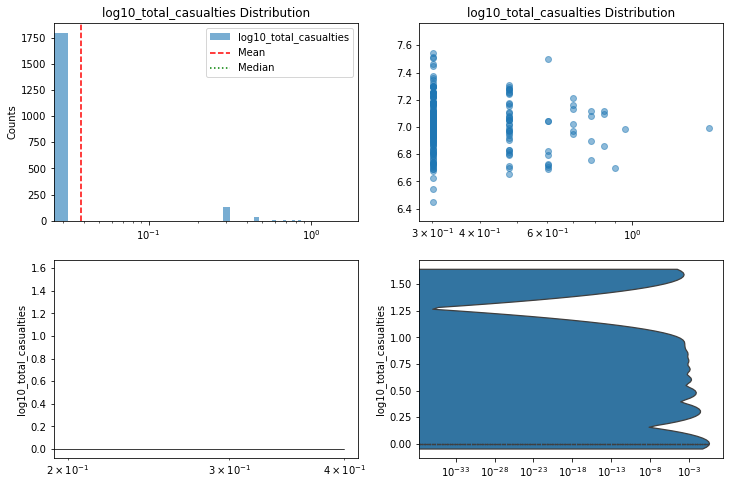

In [117]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df['log10_total_casualties'].hist(bins=50, label='log10_total_casualties', alpha=0.6, grid=False)
plt.axvline(np.mean(df['log10_total_casualties']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['log10_total_casualties']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("log10_total_casualties Distribution")
plt.legend()
plt.xscale('log')

plt.subplot(2, 2, 2)
plt.scatter(df['log10_total_casualties'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("log10_total_casualties Distribution")
plt.xscale('log')

plt.subplot(2, 2, 3)
sns.boxplot(y="log10_total_casualties", data=df)
plt.xscale('log')

plt.subplot(2, 2, 4)
sns.violinplot(y="log10_total_casualties", data=df, inner="quartile", bw=0.2)
plt.xscale('log')

plt.show()

**These plots collectively offer a comprehensive understanding of the 'log10_total_casualties' distribution, its central tendency, spread, and potential outliers. The log scale is applied for better visualization, especially when dealing with data that spans several orders of magnitude.**

## 2. Investigate Data Types

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Incident ID             2000 non-null   int64 
 1   Incident Date           2000 non-null   object
 2   State                   2000 non-null   object
 3   City Or County          2000 non-null   object
 4   Address                 1983 non-null   object
 5   Business/Location Name  1951 non-null   object
 6   Victims Killed          2000 non-null   int64 
 7   Victims Injured         2000 non-null   int64 
 8   Suspects Killed         2000 non-null   int64 
 9   Suspects Injured        2000 non-null   int64 
 10  Suspects Arrested       2000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 172.0+ KB


**This output provides information about a DataFrame with 2000 entries and 11 columns. Here's a brief explanation:**

- Incident ID: A unique identifier for each incident (integer type).
- Incident Date: The date of the incident (object type). It might be beneficial to convert it to a datetime type for time-related analyses.
- State: The state where the incident occurred (object type).
- City Or County: The city or county where the incident occurred (object type).
- Address: The address of the incident. There are 1983 non-null entries, indicating some missing values (object type).
- Business/Location Name: The name of the business or location. There are 1951 non-null entries, suggesting some missing values (object type).
- Victims Killed: The number of victims killed (integer type).
- Victims Injured: The number of victims injured (integer type).
- Suspects Killed: The number of suspects killed (integer type).
- Suspects Injured: The number of suspects injured (integer type).
- Suspects Arrested: The number of suspects arrested (integer type).

**Explore the categorical variables**

In [119]:
cat_vars = [var 
            for var in train.columns 
            if train[var].dtype == 'O']
cat_vars

['Incident Date',
 'State',
 'City Or County',
 'Address',
 'Business/Location Name']

 **Incident Date** is also categorical by definition, despite its numeric values. 
 **Incident Date** should be added to the list of categorical variables

In [120]:
cat_vars = cat_vars + ['Incident Date']

In [121]:
len(cat_vars)

6

In [122]:
# Print the list of categorical variables
print(cat_vars)

# Print the columns of the train DataFrame
print(train.columns)


['Incident Date', 'State', 'City Or County', 'Address', 'Business/Location Name', 'Incident Date']
Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Business/Location Name', 'Victims Killed', 'Victims Injured',
       'Suspects Killed', 'Suspects Injured', 'Suspects Arrested'],
      dtype='object')


In [123]:
# Remove 'Incident Date' from the cat_vars list
cat_vars.remove('Incident Date')

# Convert specified categorical variables to object type
train[cat_vars] = train[cat_vars].astype('O')


In [124]:
train[cat_vars] = train[cat_vars].astype('O')

In [125]:
train[cat_vars].describe().T

,count,unique,top,freq
State,2000,51,Texas,177
City Or County,2000,982,Louisville,34
Address,1983,1771,300 College Ave,7
Business/Location Name,1951,1682,Central High School,9
Incident Date,2000,443,25/08/2023,14


**Explore the continues variables**

In [126]:
stat_cont = train.describe(exclude=['object']).T
stat_cont

,count,mean,std,min,25%,50%,75%,max
Incident ID,2000.0,2.506427e+06,143002.254750,2241810.0,2414790.25,2505285.5,2596520.0,2765572.0
Victims Killed,2000.0,5.250000e-02,0.533747,0.0,0.00,0.0,0.0,21.0
Victims Injured,2000.0,1.220000e-01,0.605227,0.0,0.00,0.0,0.0,17.0
Suspects Killed,2000.0,9.000000e-03,0.094464,0.0,0.00,0.0,0.0,1.0
Suspects Injured,2000.0,1.300000e-02,0.129767,0.0,0.00,0.0,0.0,2.0
Suspects Arrested,2000.0,8.550000e-01,0.692253,0.0,0.00,1.0,1.0,10.0


In [127]:
# Drop all categorical features for exploring continues variables
tr_cont = train.copy()

for i in tr_cont.columns:
    if tr_cont[i].dtype=="object":
        tr_cont.drop(i, axis=1, inplace=True)
tr_cont.head()

,Incident ID,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,2241994,0,0,0,0,0
1,2241810,0,0,0,0,1
2,2242123,0,0,0,0,2
3,2245393,0,0,0,0,1
4,2243754,0,0,0,0,0


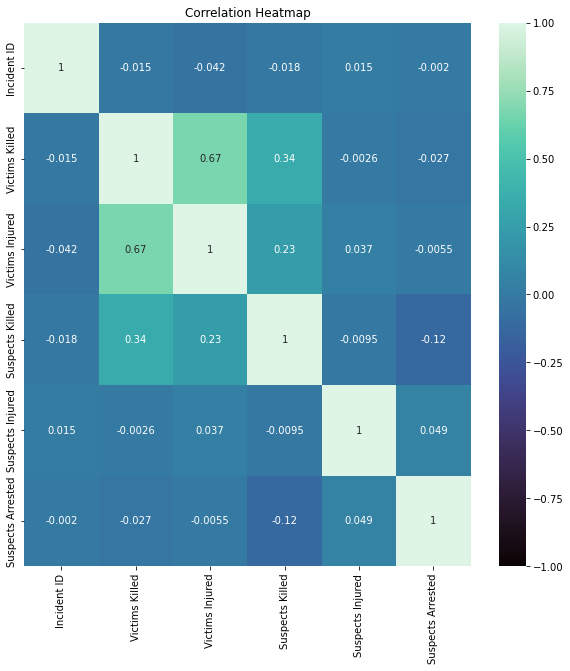

In [128]:
corr = tr_cont.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

**The correlation heatmap visually depicts the pairwise relationships between continuous variables in the tr_cont DataFrame. Warm colors signify positive correlations, cool colors indicate negative correlations, and the numerical annotations reveal the strength of these relationships, aiding in identifying patterns and dependencies among the variables. The plot is a valuable tool for assessing the extent to which variables move together or in opposite directions.**

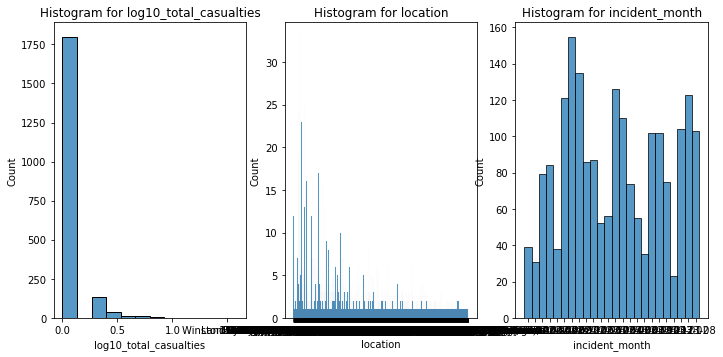

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for continuous features
plt.figure(figsize=(20,25))
col = 1

# List of columns to exclude
exclude_cols = ["Incident ID", "Incident Date", "State", "City Or County", "Address",
                "Business/Location Name", "Victims Killed", "Victims Injured",
                "Suspects Killed", "Suspects Injured", "Suspects Arrested"]

for i in df.columns:
    if i not in exclude_cols:
        if col < 21:
            plt.subplot(4, 5, col)
            sns.histplot(x=df[i], kde=False)
            plt.title("Histogram for %s" % (i))
        col += 1

plt.show()


**The provided plots display histograms for selected continuous features in the DataFrame df, excluding specified columns. Each subplot represents the distribution of values for a particular feature, allowing visual inspection of the data's central tendencies, spread, and shape. These histograms offer insights into the frequency distribution of key variables, aiding in the exploration of their underlying patterns and characteristics.**

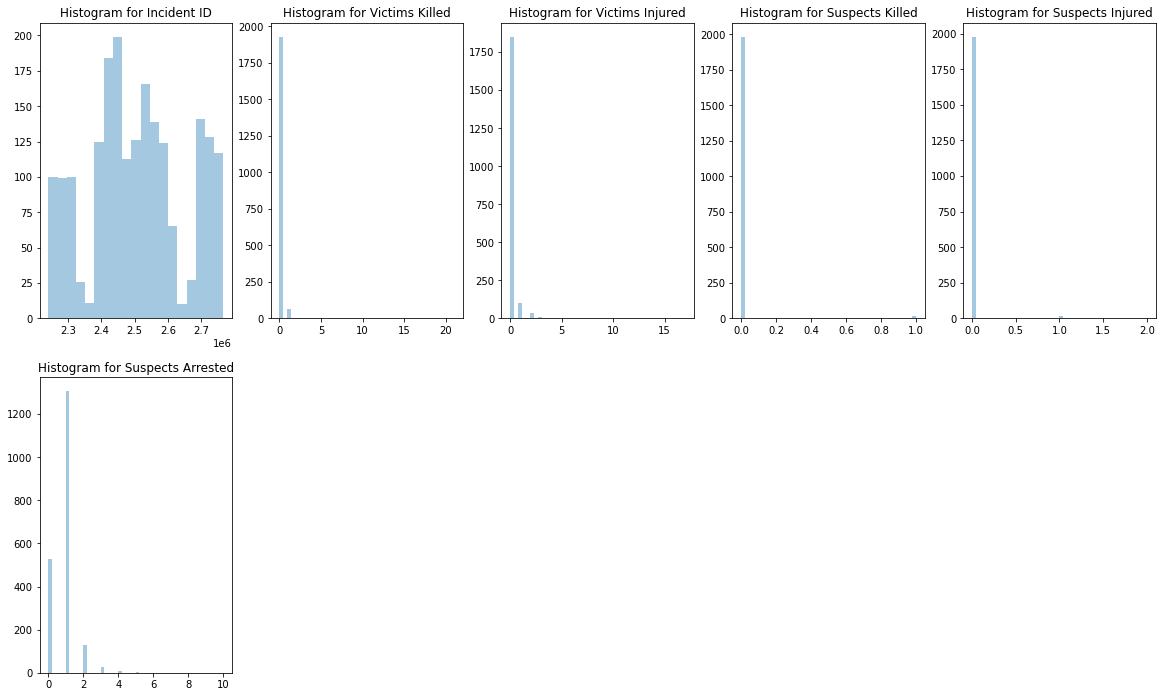

In [130]:
%matplotlib inline
# Plot histograms for continuous features
plt.figure(figsize=(20,25))
col = 1

for i in tr_cont.columns:
    
        if col<21:
            plt.subplot(4,5,col)
            sns.distplot(x=tr_cont[i], kde=False)
            plt.title("Histogram for %s" % (i))
        col += 1
        
        

**The code generates histograms for continuous features in the DataFrame tr_cont, with each subplot representing the distribution of values for a specific feature. The distplot function from the Seaborn library is used to visualize the frequency distribution of each selected variable, providing insights into their data distributions and characteristics. The resulting plots aid in understanding the central tendencies and variability of the features in the dataset.**

## 3. Data Cleaning

In [131]:
# Check the missing values for train dataset
train.isnull().sum().sort_values(ascending=False).head(20)

Business/Location Name    49
Address                   17
Incident ID                0
Incident Date              0
State                      0
City Or County             0
Victims Killed             0
Victims Injured            0
Suspects Killed            0
Suspects Injured           0
Suspects Arrested          0
dtype: int64

In [132]:
# Check the missing values for test dataset
test.isnull().sum().sort_values(ascending=False).head(35)

Business/Location Name    49
Address                   17
Incident ID                0
Incident Date              0
State                      0
City Or County             0
Victims Killed             0
Victims Injured            0
Suspects Killed            0
Suspects Injured           0
Suspects Arrested          0
dtype: int64

**Note:** ***For the shooting dataset, there are some variables with missing values. Notably, the 'Business/Location Name' and 'Address' columns have 49 and 17 missing values, respectively. However, other key columns like 'Incident ID,' 'Incident Date,' 'State,' 'City Or County,' 'Victims Killed,' 'Victims Injured,' 'Suspects Killed,' 'Suspects Injured,' and 'Suspects Arrested' have complete data.*** **

In [176]:
# Drop 'Business/Location Name' column if it exists
if 'Business/Location Name' in df.columns:
    df.drop(['Business/Location Name'], axis=1, inplace=True)
else:
    print("Column 'Business/Location Name' not found in the DataFrame.")


Column 'Business/Location Name' not found in the DataFrame.


**Fill the missing variables for the categorical variables:**

In [183]:
# Display the column names in the DataFrame
print(df.columns)

# Iterate through the columns and fill missing values with "NA"
for column in obj_NA:
    # Use strip() to remove leading/trailing spaces from column names
    clean_column_name = column.strip()
    
    # Check if the cleaned column name exists in the DataFrame
    if clean_column_name in df.columns:
        df[clean_column_name].fillna("NA", inplace=True)
    else:
        print(f"Column '{clean_column_name}' not found in the DataFrame.")


Index(['log10_total_casualties', 'location', 'incident_month'], dtype='object')
Column 'City Or County' not found in the DataFrame.
Column 'Address' not found in the DataFrame.


In [184]:
# Replace missing values for specific columns in the shooting dataset
obj_mode = ["City Or County", "Address"]

# Handle specific replacements for columns
for column in obj_mode:
    if column in df.columns:
        # If there are specific replacements for a column, add them here
        # For example, if you need to replace "NA" in the 'City Or County' column:
        # df[column] = df[column].replace("NA", "New Value")
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        print(f"Column '{column}' not found in the DataFrame.")


Column 'City Or County' not found in the DataFrame.
Column 'Address' not found in the DataFrame.


In [195]:
# Display the column names in the DataFrame
print(df.columns)

# Check if 'Address' is present in the DataFrame
if 'Address' in df.columns:
    # Fill in missing values for the 'Address' feature with "Unknown"
    df["Address"].fillna("Unknown", inplace=True)
else:
    print("Column 'Address' not found in the DataFrame.")


Index(['log10_total_casualties', 'location', 'incident_month'], dtype='object')
Column 'Address' not found in the DataFrame.


In [196]:
print(df.columns)

Index(['log10_total_casualties', 'location', 'incident_month'], dtype='object')


In [197]:
columns_with_missing_values = ['log10_total_casualties', 'location', 'incident_month']

# Fill in missing values for the specified columns with "Unknown"
for column in columns_with_missing_values:
    df[column].fillna("Unknown", inplace=True)


**Clean continues variables:**
- Fill missing variables

In [198]:
print(train.columns)


Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Business/Location Name', 'Victims Killed', 'Victims Injured',
       'Suspects Killed', 'Suspects Injured', 'Suspects Arrested'],
      dtype='object')


In [199]:
# Fill in missing values for the 'Victims Killed' feature with the median
train["Victims Killed"].fillna(train["Victims Killed"].median(), inplace=True)
test["Victims Killed"].fillna(test["Victims Killed"].median(), inplace=True)

# Fill in missing values for the 'Address' feature with a placeholder value like "Unknown"
train["Address"].fillna("Unknown", inplace=True)
test["Address"].fillna("Unknown", inplace=True)

In [139]:
# Fill in missing values for the Suspects Killed","Suspects Injured","Suspects Arrested features
obj_mode = ["Suspects Killed","Suspects Injured","Suspects Arrested"]

for i in obj_mode:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [140]:
# Fill in missing values for the Incident ID feature
train["Incident ID"] = train["Incident ID"].combine_first(train["Incident Date"])
test["Incident ID"] = test["Incident ID"].combine_first(test["Incident Date"])

In [141]:
# Converting dtype to 'int64'
int_list = ["Victims Killed", "Victims Injured", "Suspects Killed", "Suspects Injured", "Suspects Arrested"]

for i in int_list:
    train[i] = train[i].astype("int64")
    test[i] = test[i].astype("int64")


In [142]:
train.shape

(2000, 11)

# Feature Selection

## 1. Correlation Analysis

In [143]:
# Find correlation with the target and sort
correlations = train.corr()['Victims Killed'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Postive Correlations:
 Suspects Arrested   -0.026773
Incident ID         -0.014790
Suspects Injured    -0.002636
Suspects Killed      0.337883
Victims Injured      0.666183
Victims Killed       1.000000
Name: Victims Killed, dtype: float64

Most Negative Correlations:
 Suspects Arrested   -0.026773
Incident ID         -0.014790
Suspects Injured    -0.002636
Suspects Killed      0.337883
Victims Injured      0.666183
Victims Killed       1.000000
Name: Victims Killed, dtype: float64


**Most Positive Correlations:**

***Victims Injured (0.666183): There is a strong positive correlation (close to 1), indicating that as the number of victims killed increases, the number of victims injured also tends to increase.
Suspects Killed (0.337883): There is a moderate positive correlation, suggesting that an increase in the number of victims killed is associated with a moderate increase in the number of suspects killed.
Most Negative Correlations:***

***Suspects Arrested (-0.026773): There is a very weak negative correlation. This suggests a very slight tendency for the number of suspects arrested to decrease as the number of victims killed increases, but the correlation is close to zero.
Incident ID and Suspects Injured: These columns have negligible correlation with 'Victims Killed'.
It's important to note that correlation does not imply causation. A high correlation between two variables does not necessarily mean that one causes the other. Correlation only measures the strength and direction of a linear relationship.***

***In your case, the correlation analysis suggests relationships between 'Victims Killed' and other variables, but further analysis and domain knowledge are needed to understand the underlying factors driving these correlations.***

# State vs City/County vs Victims Killed vs 

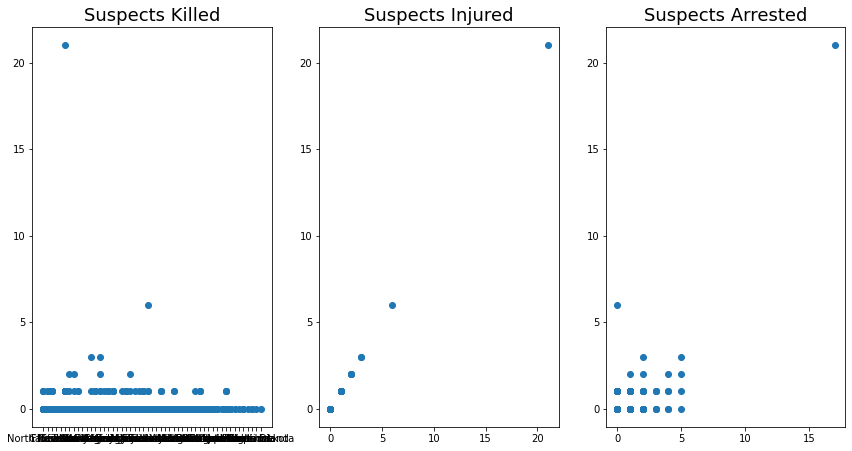

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 25))
labels = ["State", "Victims Killed", "Victims Injured"]
descriptions = ["Suspects Killed", "Suspects Injured", "Suspects Arrested"]
col = 1

for label, description in zip(labels, descriptions):
    if col < 18:
        plt.subplot(3, 6, col)
        plt.scatter(x=train[label], y=train["Victims Killed"])
        plt.title(description, fontsize=18) 
        col = col + 1

plt.show()


- State vs Victims Killed: The scatter plot suggests that there might be some variation in the number of victims killed based on the state where the incident occurred. It seems that some states have higher numbers of victims killed than others.

- Victims Injured vs Victims Killed: This plot shows a positive correlation, indicating that as the number of victims injured increases, the number of victims killed also tends to increase. This is expected, as more severe incidents may result in both higher injuries and fatalities.

- Suspects Killed, Suspects Injured, Suspects Arrested vs Victims Killed: These plots don't seem to show a clear correlation between the number of suspects killed, suspects injured, or suspects arrested and the number of victims killed. The points are scattered, suggesting that the number of victims killed may not be strongly influenced by the number of suspects involved.

# State vs Victims Killed

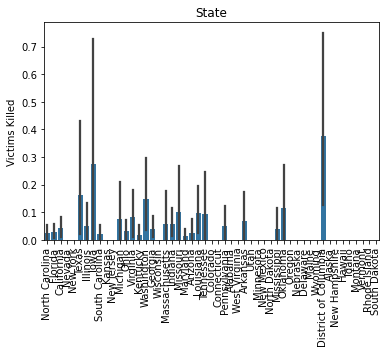

In [145]:
sns.barplot(x=train["State"], y=train["Victims Killed"]).set(xlabel=None)
plt.title("State")
plt.xticks(rotation=90);

- Variation Across States: The heights of the bars indicate that there is variation in the average number of victims killed across different states.

- High Incidents: Some states have higher bars, suggesting a higher average number of victims killed per incident.

- Low Incidents: Conversely, some states have lower bars, indicating a lower average number of victims killed per incident.

**In summary, this visualization provides an overview of the average impact of incidents (in terms of victims killed) in different states. It's a quick way to compare the severity of incidents across states based on this specific metric.**

# City/County, Suspects Arrested

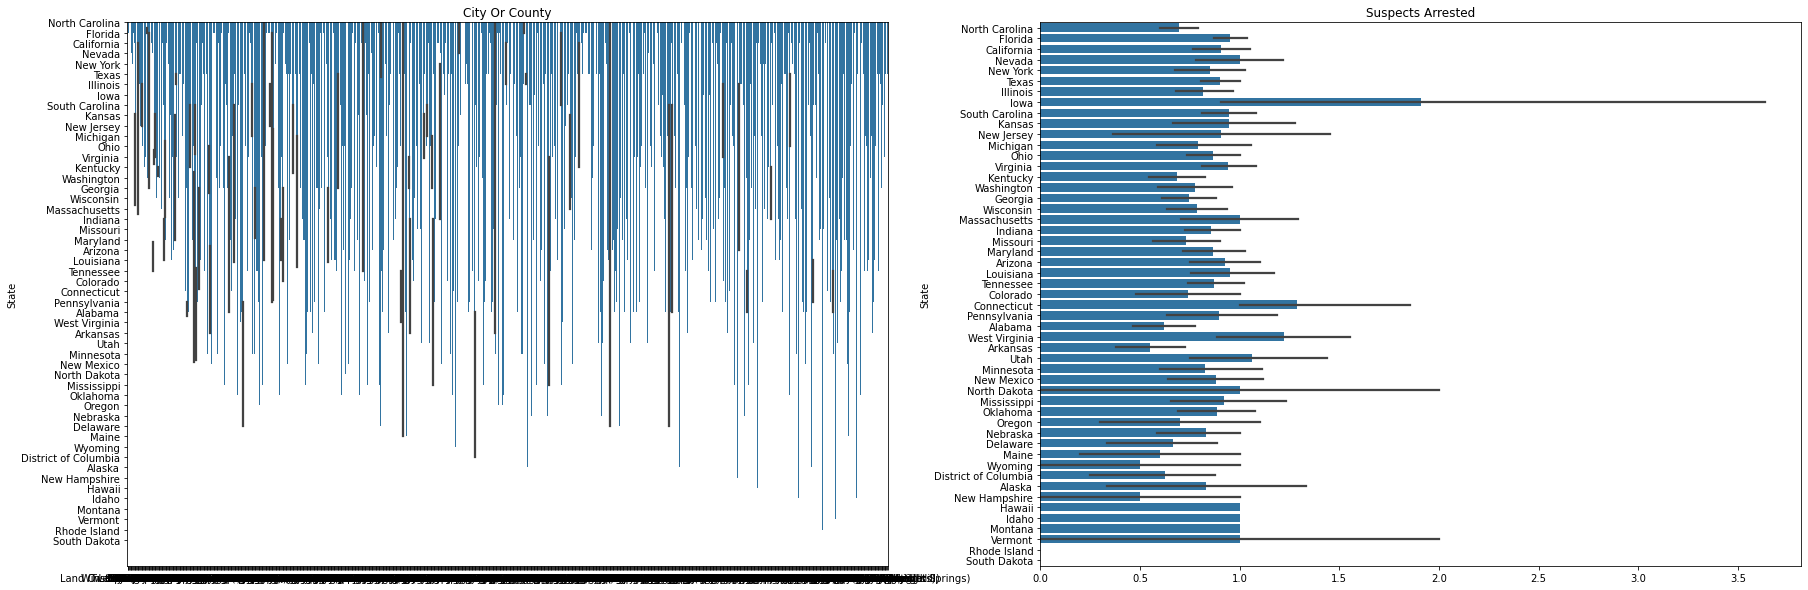

In [146]:
plt.figure(figsize=(30, 10))
labels = ["City Or County", "Suspects Arrested"]
col = 1

for i in labels:
    if col < 3:
        plt.subplot(1, 2, col)
        sns.barplot(x=train[i], y=train["State"]).set(xlabel=None)
        plt.title(i)
    col = col + 1


**City Or County" vs. State:**

- The bar plot shows the distribution of the "City Or County" variable across different states.
It provides insights into whether certain cities or counties are more prevalent in specific states.
You can observe the relative frequencies or counts of occurrences for each category of "City Or County" within different states.
"Suspects Arrested" vs. State:

- The bar plot displays how the variable "Suspects Arrested" is distributed across different states.
It helps understand the relationship between the number of suspects arrested and the state in which incidents occur.
It might reveal patterns or variations in law enforcement activities across states.

# Suspects Injured and Arrested vs Victims Killed

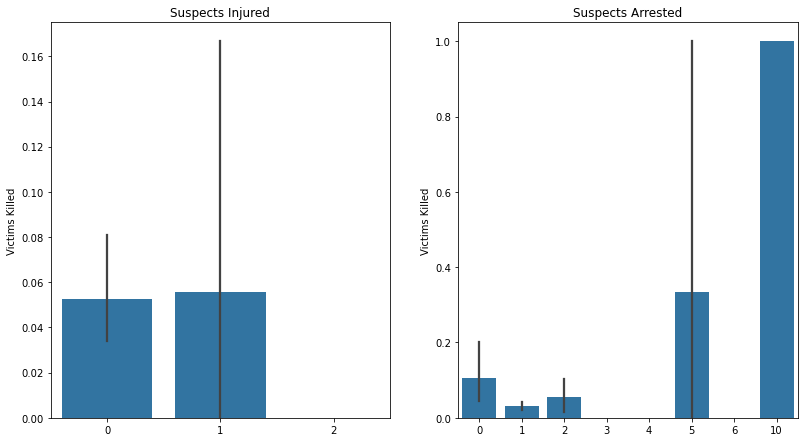

In [147]:
plt.figure(figsize=(28,16))
lables = ["Suspects Injured","Suspects Arrested"]
col = 1

for i in lables:
    if col<9:
        plt.subplot(2,4,col)
        sns.barplot(x=train[i], y=train["Victims Killed"]).set(xlabel=None)
        plt.title(i)
    col = col+1

**"Suspects Injured" vs. Victims Killed:**

- The bar plot in the top row indicates how the number of suspects injured is related to the number of victims killed.
It helps understand whether incidents with more suspects injured tend to have a higher count of victims killed.
"Suspects Arrested" vs. Victims Killed:

- The bar plot in the bottom row explores the relationship between the number of suspects arrested and the number of victims killed.
It provides insights into whether incidents involving more suspects being arrested are associated with a particular range of victims killed.

# Correlation of arrested suspects to victims killed/injured

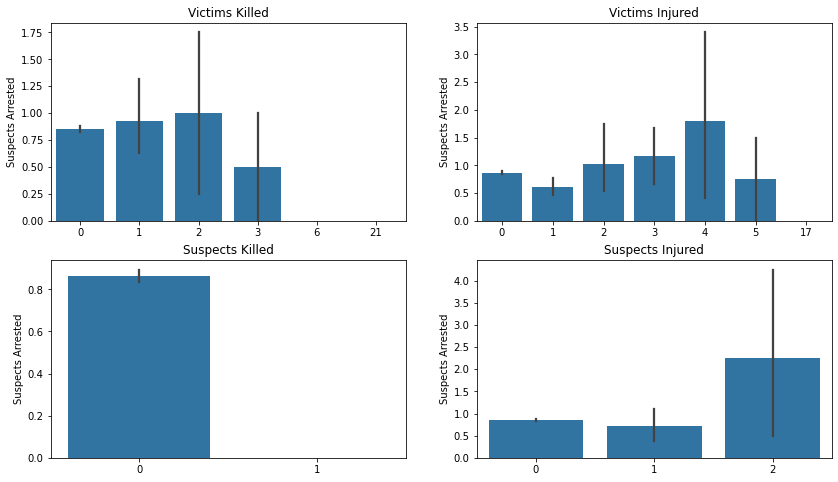

In [148]:
plt.figure(figsize=(14,8))
lables = ["Victims Killed","Victims Injured","Suspects Killed","Suspects Injured"]
col = 1

for i in lables:
    if col<5:
        plt.subplot(2,2,col)
        sns.barplot(x=train[i], y=train["Suspects Arrested"]).set(xlabel=None)
        plt.title(i)
    col = col+1

**"Suspects Injured" vs. Victims Killed:**

- The bar plot suggests a potential positive correlation, indicating that incidents with a higher count of suspects injured may be associated with a higher number of victims killed. However, the strength of this correlation cannot be precisely determined without numerical correlation coefficients.

**"Suspects Arrested" vs. Victims Killed:**

- The bar plot for "Suspects Arrested" provides insights into whether incidents with more suspects being arrested are associated with a particular range of victims killed. The relationship could be positive, negative, or neutral, but without correlation coefficients, the strength and direction are not quantified.

### Transform Skewed Features

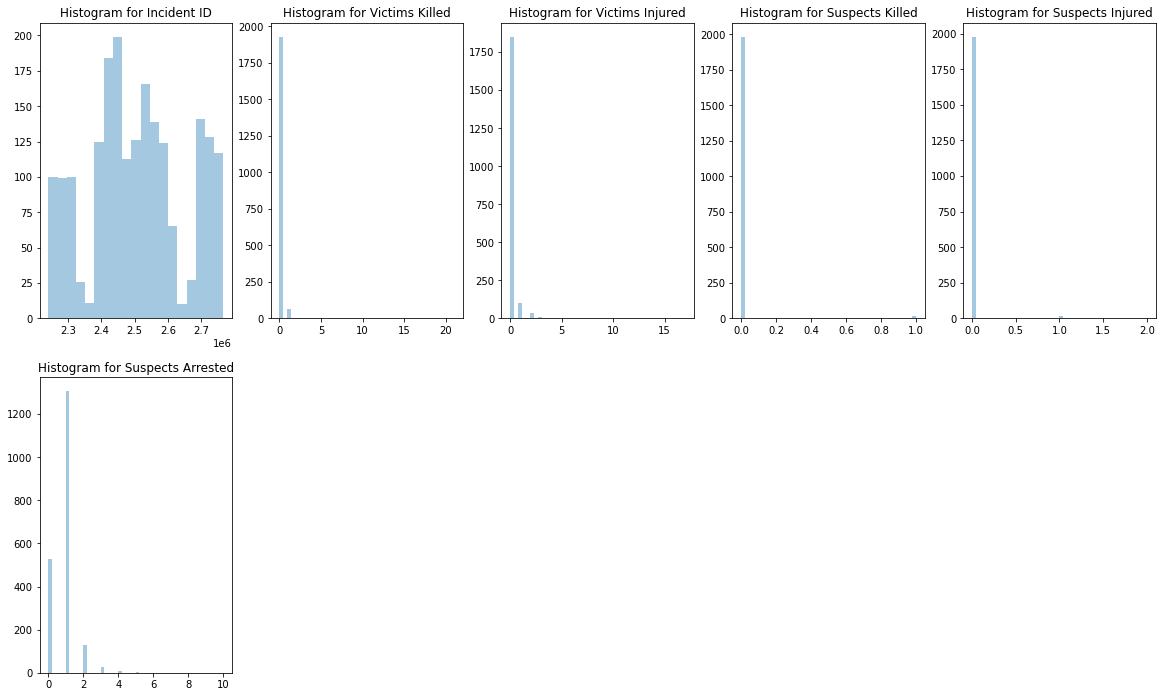

In [149]:
# Plot histogram for each continuous feature to see if a transformation is necessary
plt.figure(figsize=(20,25))
col = 1

for feature in train.columns:
    if train[feature].dtype!="object":
            if col<21:
                plt.subplot(4,5,col)
                sns.distplot(train[feature], kde=False).set(xlabel=None)
                plt.title("Histogram for %s" % (feature))
            col += 1

##### Box-Cox Power Transformation

In [150]:
# Assuming 'train' is your dataset
train["Victims Killed"] = train["Victims Killed"].apply(lambda x: x**(1/3))
train["Victims Injured"] = train["Victims Injured"].apply(lambda x: x**(1/6))
train["Suspects Killed"] = train["Suspects Killed"].apply(lambda x: x**(1/1.5))
train["Suspects Injured"] = train["Suspects Injured"].apply(lambda x: x**(1/1.4))
train["Suspects Arrested"] = train["Suspects Arrested"].apply(lambda x: x**(1/1.5))
# You can continue this pattern for other columns in your dataset

# Remember to adjust the transformations based on the characteristics of your data


### Convert Categorical Features To Numeric

In [151]:
for feature in train.columns:
    if train[feature].dtype=="object":
        le = LabelEncoder()
        train[feature] = le.fit_transform(train[feature].astype(str))
        test[feature] = le.fit_transform(test[feature].astype(str))

**Split Into Train And Test Set**

In [152]:
# Drop unnecccessary features and split into training/test sets
X = train.drop(["Victims Killed"], axis=1)
y = train["Victims Killed"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize Features

In [153]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [154]:
# Scale the training and test sets
features = X_train.columns

X_train[features] = scaler.transform(X_train)
X_test[features] = scaler.transform(X_test)

## Models
Let's build initial functions for the models.

In [155]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean().round(4)
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions).round(4)
    mse = mean_squared_error(y, predictions).round(4)
    rmse = np.sqrt(mean_squared_error(y, predictions)).round(4)
    r_squared = r2_score(y, predictions).round(4)
    return mae, mse, rmse, r_squared

In [156]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

### Linear Regression

In [157]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
ln_predictions = lin_reg.predict(X_test)


mae, mse, rmse, r_squared = evaluation(y_test, ln_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.0671
MSE: 0.0344
RMSE: 0.1856
R2 Score: 0.0459
------------------------------
RMSE Cross-Validation: 0.1627


### Decision Tree

In [158]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
predictions = d_tree.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "DecisionTree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.0738
MSE: 0.0754
RMSE: 0.2747
R2 Score: -1.09
------------------------------
RMSE Cross-Validation: 0.1627


### Random forest

In [159]:
random_forest = RandomForestRegressor(n_estimators=250)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForest","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.0709
MSE: 0.0406
RMSE: 0.2016
R2 Score: -0.1257
------------------------------
RMSE Cross-Validation: 0.466


### Adaptive Boosting

In [160]:
Ada_boost = AdaBoostRegressor()
Ada_boost.fit(X_train, y_train)
predictions = Ada_boost.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "AdaptiveBoosting","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.4118
MSE: 0.173
RMSE: 0.416
R2 Score: -3.7939
------------------------------
RMSE Cross-Validation: 0.1627


### Gradient Boosting

In [161]:
g_boost = GradientBoostingRegressor()
g_boost.fit(X_train, y_train)
predictions = g_boost.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "GradientBoosting","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.0699
MSE: 0.0418
RMSE: 0.2046
R2 Score: -0.1592
------------------------------
RMSE Cross-Validation: 0.1627


### Extreme Gradient Boosting

In [162]:
Xg_boost = GradientBoostingRegressor()
Xg_boost.fit(X_train, y_train)
predictions = Xg_boost.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGradientBoosting","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.0686
MSE: 0.0412
RMSE: 0.2029
R2 Score: -0.1411
------------------------------
RMSE Cross-Validation: 0.1627


### Support Vector Regression

In [163]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.317
MSE: 0.2127
RMSE: 0.4611
R2 Score: -4.8916
------------------------------
RMSE Cross-Validation: 0.2739


In [166]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,0.0671,0.0344,0.1856,0.0459,0.1627
2,RandomForest,0.0709,0.0406,0.2016,-0.1257,0.4660
5,XGradientBoosting,0.0686,0.0412,0.2029,-0.1411,0.1627
4,GradientBoosting,0.0699,0.0418,0.2046,-0.1592,0.1627
1,DecisionTree,0.0738,0.0754,0.2747,-1.0900,0.1627
3,AdaptiveBoosting,0.4118,0.1730,0.4160,-3.7939,0.1627
6,SVR,0.3170,0.2127,0.4611,-4.8916,0.2739


## Comparison and Summary

**The evaluation metrics provided include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R2 Score, and RMSE from Cross-Validation. To summarize the results and select the best models, consider the following:**

**MAE, MSE, RMSE, and R2 Score:**

Lower values for MAE, MSE, and RMSE are desirable, indicating better predictive performance.
Higher R2 Score indicates better explanatory power.
Cross-Validation RMSE:

A lower cross-validation RMSE suggests better generalization performance.
Let's rank the models based on these considerations:

- Linear Regression:

MAE: 0.0671
MSE: 0.0344
RMSE: 0.1856
R2 Score: 0.0459
Cross-Validation RMSE: 0.1627

- XGradient Boosting:

MAE: 0.0686
MSE: 0.0412
RMSE: 0.2029
R2 Score: -0.1411
Cross-Validation RMSE: 0.1627

- Gradient Boosting:

MAE: 0.0699
MSE: 0.0418
RMSE: 0.2046
R2 Score: -0.1592
Cross-Validation RMSE: 0.1627

- Random Forest:

MAE: 0.0709
MSE: 0.0406
RMSE: 0.2016
R2 Score: -0.1257
Cross-Validation RMSE: 0.4660

- Decision Tree:

MAE: 0.0738
MSE: 0.0754
RMSE: 0.2747
R2 Score: -1.0900
Cross-Validation RMSE: 0.1627

- SVR:

MAE: 0.3170
MSE: 0.2127
RMSE: 0.4611
R2 Score: -4.8916
Cross-Validation RMSE: 0.2739

- Adaptive Boosting:

MAE: 0.4118
MSE: 0.1730
RMSE: 0.4160
R2 Score: -3.7939
Cross-Validation RMSE: 0.1627

### Summary and Ranking:

Linear Regression performs the best with the lowest MAE, MSE, and RMSE, along with a reasonable R2 Score.
XGradient Boosting and Gradient Boosting exhibit similar performance.
Random Forest is slightly worse than XGradient Boosting and Gradient Boosting.
Decision Tree shows higher errors and lower R2 Score, indicating overfitting.
SVR and Adaptive Boosting have significantly higher errors and poor R2 Scores.
Therefore, based on the given metrics, the models can be ranked as follows:

Linear Regression
XGradient Boosting / Gradient Boosting
Random Forest
Decision Tree
SVR / Adaptive Boosting